<a href="https://colab.research.google.com/github/amandafriedmann/NEUR-Data-Analysis/blob/main/FINAL_PROJECT_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atherosclerosis data

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
atherosclerosis_data = pd.read_csv('https://raw.githubusercontent.com/amandafriedmann/NEUR-Data-Analysis/main/ATHERO%20REAL%20DATA.csv')
microinfarcts_data = pd.read_csv('https://raw.githubusercontent.com/amandafriedmann/NEUR-Data-Analysis/main/MICRO%20REAL%20DATA%20V2.csv')
print(atherosclerosis_data.shape)
print(microinfarcts_data.shape)
print(atherosclerosis_data)
print(microinfarcts_data)

(84, 3)
(84, 3)
   Atherosclerosis  number of Hematoxylin positive nuclei_Grey matter  \
0             Mild                                             140399   
1             Mild                                              86781   
2         Moderate                                             117450   
3             Mild                                              47069   
4             Mild                                              58939   
..             ...                                                ...   
79        Moderate                                              45037   
80            Mild                                              77976   
81        Moderate                                              85695   
82            Mild                                              93682   
83        Moderate                                              91856   

    average Hematoxylin positive nucleus area_Grey matter  
0                                           27.

<Axes: ylabel='Atherosclerosis'>

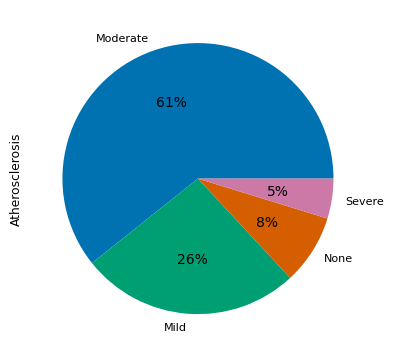

In [21]:
#Atherosclerosis grouping variable distribution#Atherosclerosis grouping variable distribution
atherosclerosis_data['Atherosclerosis'].value_counts().plot(kind='pie',autopct='%1.0f%%')

Text(0, 0.5, 'Frequency')

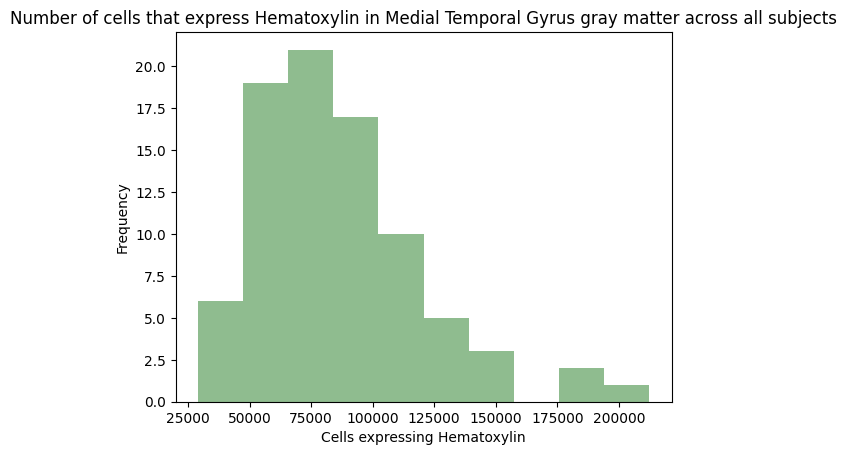

In [5]:
#Atherosclerosis number of Hematoxylin positive nuclei_Grey matter distribution
atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'].plot(kind='hist', color = 'darkseagreen')
plt.title('Number of cells that express Hematoxylin in Medial Temporal Gyrus gray matter across all subjects')
plt.xlabel('Cells expressing Hematoxylin')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

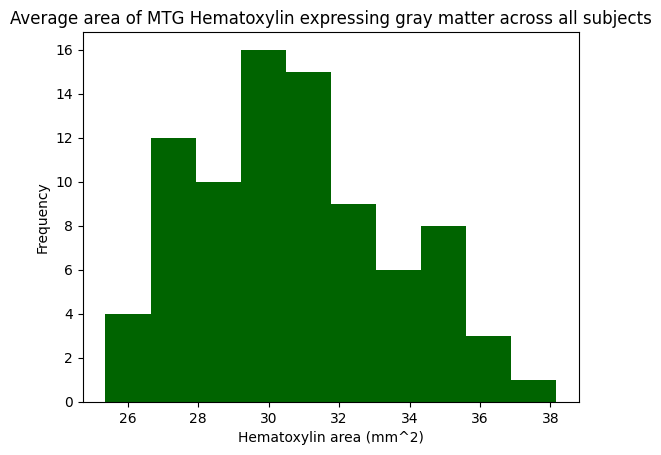

In [6]:
#Atherosclerosis average Hematoxylin positive nucleus area_Grey matter distribution
atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'].plot(kind='hist', color = 'darkgreen')
plt.title('Average area of MTG Hematoxylin expressing gray matter across all subjects')
plt.xlabel('Hematoxylin area (mm^2)')
plt.ylabel('Frequency')

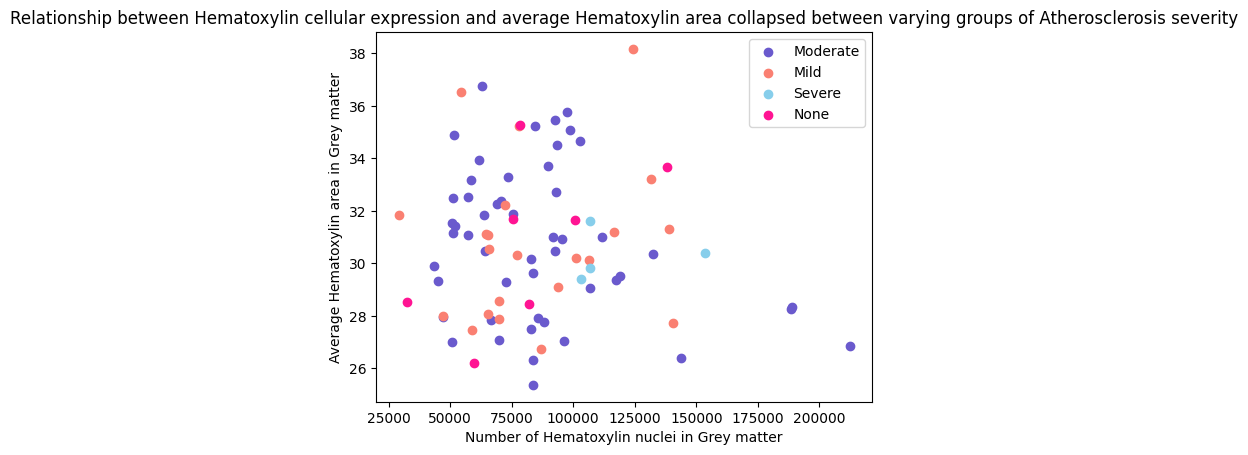

In [7]:
#scatterplot of dependent variables across groups
moderate_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Moderate']
mild_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Mild']
severe_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Severe']
none_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'None']

plt.scatter(moderate_df['number of Hematoxylin positive nuclei_Grey matter'],moderate_df['average Hematoxylin positive nucleus area_Grey matter'], color = "slateblue")
plt.scatter(mild_df['number of Hematoxylin positive nuclei_Grey matter'],mild_df['average Hematoxylin positive nucleus area_Grey matter'], color = "salmon")
plt.scatter(severe_df['number of Hematoxylin positive nuclei_Grey matter'],severe_df['average Hematoxylin positive nucleus area_Grey matter'], color = "skyblue")
plt.scatter(none_df['number of Hematoxylin positive nuclei_Grey matter'],none_df['average Hematoxylin positive nucleus area_Grey matter'], color = "deeppink")

plt.xlabel('Number of Hematoxylin nuclei in Grey matter')
plt.ylabel('Average Hematoxylin area in Grey matter')
plt.title('Relationship between Hematoxylin cellular expression and average Hematoxylin area collapsed between varying groups of Atherosclerosis severity')
plt.legend(['Moderate','Mild','Severe', 'None'])

<ipython-input-8-f6185b1776e7>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


Text(0.5, 1.0, 'Number of Hematoxylin expressing cells dependent on Atherosclerosis severity')

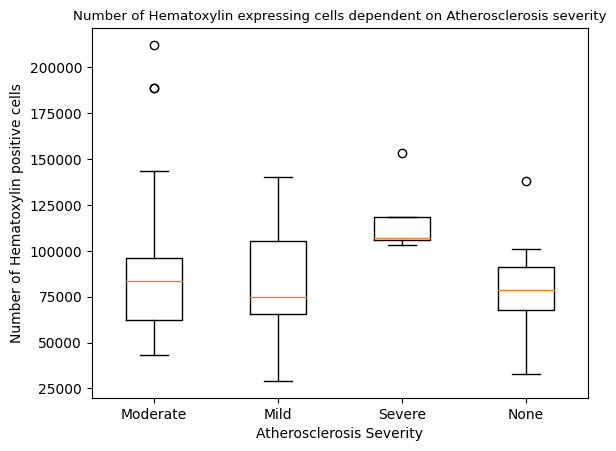

In [8]:
#boxplot for number of Hematoxylin positive nuclei_Grey matter across different groups

moderate_number = moderate_df['number of Hematoxylin positive nuclei_Grey matter']
mild_number = mild_df['number of Hematoxylin positive nuclei_Grey matter']
severe_number = severe_df['number of Hematoxylin positive nuclei_Grey matter']
none_number = none_df['number of Hematoxylin positive nuclei_Grey matter']
data = [moderate_number.tolist(), mild_number.tolist(), severe_number.tolist(), none_number.tolist()]
plt.boxplot(data)
plt.xlabel('Atherosclerosis Severity')
plt.ylabel('Number of Hematoxylin positive cells')
plt.xticks([1,2,3,4],['Moderate', 'Mild', 'Severe', 'None'])
plt.style.use('seaborn-paper')
plt.title('Number of Hematoxylin expressing cells dependent on Atherosclerosis severity')

<ipython-input-9-327caf074ceb>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


Text(0.5, 1.0, 'Average Hematoxylin positive area dependent on Atherosclerosis severity')

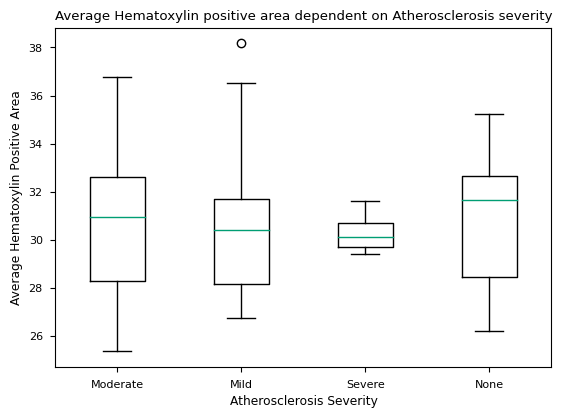

In [9]:
#boxplot for average Hematoxylin positive nucleus area_Grey matter across different groups

moderate_number = moderate_df['average Hematoxylin positive nucleus area_Grey matter']
mild_number = mild_df['average Hematoxylin positive nucleus area_Grey matter']
severe_number = severe_df['average Hematoxylin positive nucleus area_Grey matter']
none_number = none_df['average Hematoxylin positive nucleus area_Grey matter']
data = [moderate_number.tolist(), mild_number.tolist(), severe_number.tolist(), none_number.tolist()]
plt.boxplot(data)
plt.xlabel('Atherosclerosis Severity')
plt.ylabel('Average Hematoxylin Positive Area')
plt.xticks([1,2,3,4],['Moderate', 'Mild', 'Severe', 'None'])
plt.style.use('seaborn-colorblind')
plt.title('Average Hematoxylin positive area dependent on Atherosclerosis severity')

<Axes: ylabel='Total Microinfarcts (not observed grossly)'>

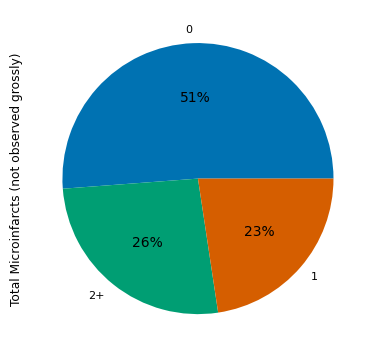

In [22]:
#Total Microinfarcts grouping variable distribution
microinfarcts_data['Total Microinfarcts (not observed grossly)'].value_counts().plot(kind='pie',autopct='%1.0f%%')

Text(0, 0.5, 'Frequency')

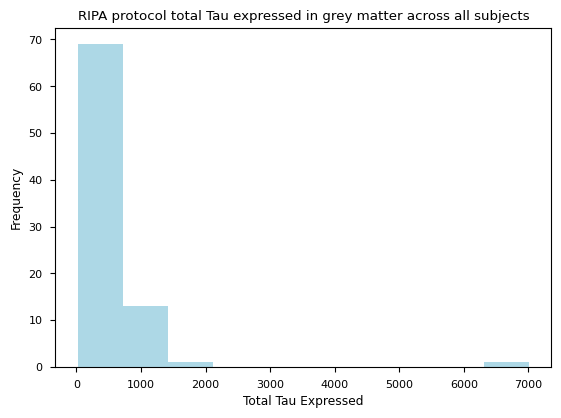

In [11]:
#Total Microinfarcts ripa tTau_Grey matter distribution
microinfarcts_data['ripa tTau_Grey matter'].plot(kind='hist', color = 'lightblue')
plt.title('RIPA protocol total Tau expressed in grey matter across all subjects')
plt.xlabel('Total Tau Expressed')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

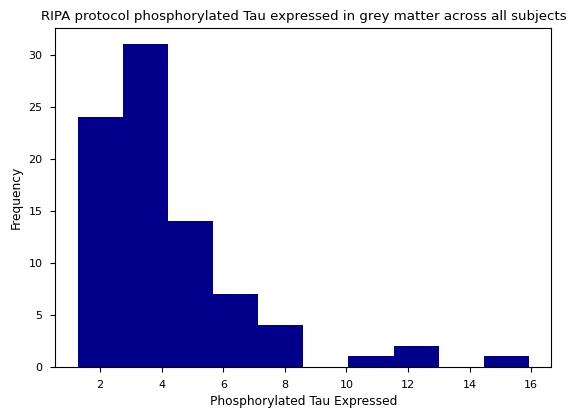

In [12]:
#Total Microinfarcts ripa pTau_Grey matter distribution
microinfarcts_data['ripa pTau_Grey matter'].plot(kind='hist', color = 'darkblue')
plt.title('RIPA protocol phosphorylated Tau expressed in grey matter across all subjects')
plt.xlabel('Phosphorylated Tau Expressed')
plt.ylabel('Frequency')

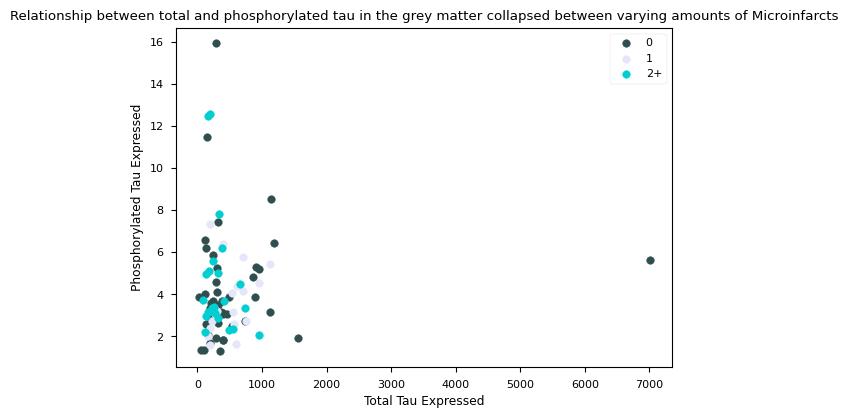

In [13]:
#scatterplot of dependent variables across groups
zero_df = microinfarcts_data[microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '0']
one_df = microinfarcts_data[microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '1']
twoplus_df = microinfarcts_data[microinfarcts_data['Total Microinfarcts (not observed grossly)'] == '2+']

plt.scatter(zero_df['ripa tTau_Grey matter'],zero_df['ripa pTau_Grey matter'], color = "darkslategray")
plt.scatter(one_df['ripa tTau_Grey matter'],one_df['ripa pTau_Grey matter'], color = "lavender")
plt.scatter(twoplus_df['ripa tTau_Grey matter'],twoplus_df['ripa pTau_Grey matter'], color = "darkturquoise")


plt.xlabel('Total Tau Expressed')
plt.ylabel('Phosphorylated Tau Expressed')
plt.title('Relationship between total and phosphorylated tau in the grey matter collapsed between varying amounts of Microinfarcts')
plt.legend(['0','1','2+'])

<ipython-input-20-7ece7c1bf9a6>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


Text(0.5, 1.0, 'Amount of tTau expressed in grey matter dependent on amount of Microinfarcts')

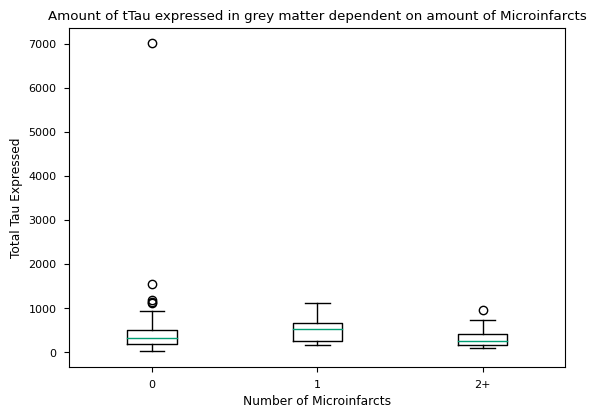

In [20]:
#boxplot for tTau expression across different groups

zero_number = zero_df['ripa tTau_Grey matter']
one_number = one_df['ripa tTau_Grey matter']
twoplus_number = twoplus_df['ripa tTau_Grey matter']

data = [zero_number.tolist(), one_number.tolist(), twoplus_number.tolist()]
plt.boxplot(data)
plt.xlabel('Number of Microinfarcts')
plt.ylabel('Total Tau Expressed')
plt.xticks([1,2,3],['0', '1', '2+'])
plt.style.use('seaborn-paper')
plt.title('Amount of tTau expressed in grey matter dependent on amount of Microinfarcts')

Text(0.5, 1.0, 'Amount of pTau expressed in grey matter dependent on amount of Microinfarcts')

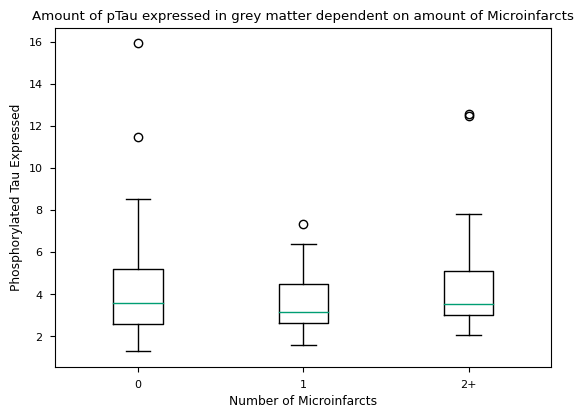

In [17]:
#boxplot for pTau expression across different groups

zero_number = zero_df['ripa pTau_Grey matter']
one_number = one_df['ripa pTau_Grey matter']
twoplus_number = twoplus_df['ripa pTau_Grey matter']

data = [zero_number.tolist(), one_number.tolist(), twoplus_number.tolist()]
plt.boxplot(data)
plt.xlabel('Number of Microinfarcts')
plt.ylabel('Phosphorylated Tau Expressed')
plt.xticks([1,2,3],['0', '1', '2+'])
plt.title('Amount of pTau expressed in grey matter dependent on amount of Microinfarcts')